In [1]:
import pandas as pd
from pathlib import Path

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
plt.style.use('fivethirtyeight')
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

In [4]:
import datetime as dt
import numpy as np
from pandas.plotting import scatter_matrix

In [5]:
import seaborn as sns

# 1. Get the stock Data of ENPH

In [6]:
#load .csv file as DataFrame
df = pd.read_csv(Path('../ML_mock_up/ENPH_Price.csv'))
df.head()
#check the null value in the column
df.isnull().any()

Date         False
Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

In [7]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-03,1.020000,1.050000,1.010000,1.050000,1.050000,445900
1,2017-01-04,1.090000,1.150000,1.050000,1.150000,1.150000,903000
2,2017-01-05,1.190000,1.190000,1.110000,1.120000,1.120000,308700
3,2017-01-06,1.120000,1.140000,1.080000,1.110000,1.110000,259700
4,2017-01-09,1.100000,1.110000,1.080000,1.110000,1.110000,180000
...,...,...,...,...,...,...,...
1297,2022-02-28,157.399994,167.949997,157.399994,166.699997,166.699997,5368900
1298,2022-03-01,167.539993,172.869995,163.520004,170.600006,170.600006,3539800
1299,2022-03-02,169.880005,169.880005,159.529999,163.889999,163.889999,3473300
1300,2022-03-03,164.860001,165.729996,157.210007,159.029999,159.029999,2329200


In [8]:
print(df.describe())

              Open         High          Low        Close    Adj Close  \
count  1302.000000  1302.000000  1302.000000  1302.000000  1302.000000   
mean     57.269339    58.975983    55.475346    57.214324    57.214324   
std      70.819424    72.705733    68.674717    70.601305    70.601305   
min       0.700000     0.710000     0.650000     0.700000     0.700000   
25%       4.360000     4.502500     4.195000     4.360000     4.360000   
50%      19.770000    20.275000    19.235000    19.665000    19.665000   
75%     119.007502   122.122501   114.515001   119.439999   119.439999   
max     269.160004   282.459991   260.579987   267.739990   267.739990   

             Volume  
count  1.302000e+03  
mean   3.092445e+06  
std    3.325321e+06  
min    9.570000e+04  
25%    1.312050e+06  
50%    2.433550e+06  
75%    3.822625e+06  
max    5.517290e+07  


# 2. Prepare the data

In [9]:
#Reformat the names of the colum of "Adj Close" so it contains no space
df.rename(columns={"Adj Close": "AdjClose"},inplace = True)
df

,Date,Open,High,Low,Close,AdjClose,Volume
0,2017-01-03,1.020000,1.050000,1.010000,1.050000,1.050000,445900
1,2017-01-04,1.090000,1.150000,1.050000,1.150000,1.150000,903000
2,2017-01-05,1.190000,1.190000,1.110000,1.120000,1.120000,308700
3,2017-01-06,1.120000,1.140000,1.080000,1.110000,1.110000,259700
4,2017-01-09,1.100000,1.110000,1.080000,1.110000,1.110000,180000
...,...,...,...,...,...,...,...
1297,2022-02-28,157.399994,167.949997,157.399994,166.699997,166.699997,5368900
1298,2022-03-01,167.539993,172.869995,163.520004,170.600006,170.600006,3539800
1299,2022-03-02,169.880005,169.880005,159.529999,163.889999,163.889999,3473300
1300,2022-03-03,164.860001,165.729996,157.210007,159.029999,159.029999,2329200


In [10]:
df.isnull().sum()

Date        0
Open        0
High        0
Low         0
Close       0
AdjClose    0
Volume      0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1302 entries, 0 to 1301
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      1302 non-null   object 
 1   Open      1302 non-null   float64
 2   High      1302 non-null   float64
 3   Low       1302 non-null   float64
 4   Close     1302 non-null   float64
 5   AdjClose  1302 non-null   float64
 6   Volume    1302 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 71.3+ KB


In [12]:
# Plot "AdjClose" and "Date" of ENPH
plt.figure(figsize=(20, 10))

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

Text(0.5, 1.0, 'Adj Close Prices of ENPH')

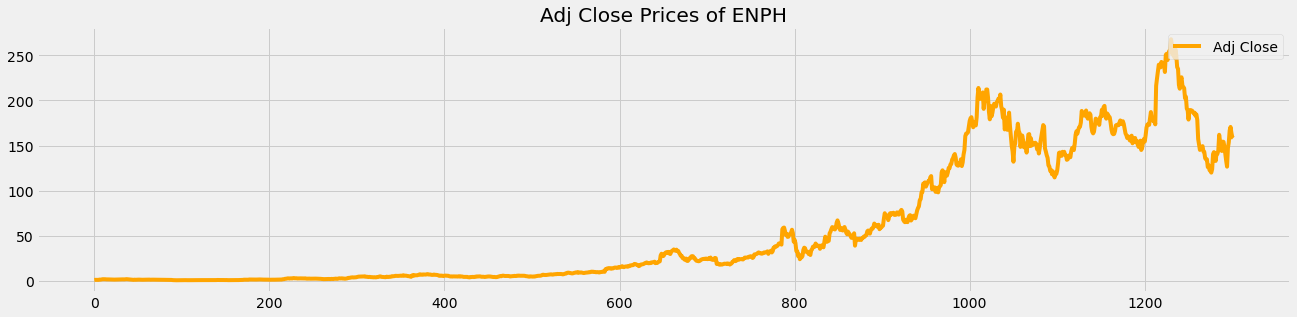

In [14]:
plt.subplot(2,1,1)
plt.plot(df['AdjClose'],  label='Adj Close', color="orange" )
plt.legend(loc="upper right")
plt.title('Adj Close Prices of ENPH')

In [15]:
# #Reindex data using a DatetimeIndex
df.set_index(pd.DatetimeIndex(df['Date']), inplace=True)

In [16]:
# print(Shape of the data:')
print(df.shape)

# # setting the index as date
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df = df.set_index('Date')
df.head()

(1302, 7)


,Open,High,Low,Close,AdjClose,Volume
Date,,,,,,
2017-01-03,1.02,1.05,1.01,1.05,1.05,445900
2017-01-04,1.09,1.15,1.05,1.15,1.15,903000
2017-01-05,1.19,1.19,1.11,1.12,1.12,308700
2017-01-06,1.12,1.14,1.08,1.11,1.11,259700
2017-01-09,1.10,1.11,1.08,1.11,1.11,180000


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1302 entries, 2017-01-03 to 2022-03-04
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Open      1302 non-null   float64
 1   High      1302 non-null   float64
 2   Low       1302 non-null   float64
 3   Close     1302 non-null   float64
 4   AdjClose  1302 non-null   float64
 5   Volume    1302 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 71.2 KB


In [18]:
df.dtypes

Open        float64
High        float64
Low         float64
Close       float64
AdjClose    float64
Volume        int64
dtype: object

In [19]:
print(df.shape)

(1302, 6)


In [20]:
df.describe()

,Open,High,Low,Close,AdjClose,Volume
count,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000,1.302000e+03
mean,57.269339,58.975983,55.475346,57.214324,57.214324,3.092445e+06
std,70.819424,72.705733,68.674717,70.601305,70.601305,3.325321e+06
min,0.700000,0.710000,0.650000,0.700000,0.700000,9.570000e+04
25%,4.360000,4.502500,4.195000,4.360000,4.360000,1.312050e+06
50%,19.770000,20.275000,19.235000,19.665000,19.665000,2.433550e+06
75%,119.007502,122.122501,114.515001,119.439999,119.439999,3.822625e+06
max,269.160004,282.459991,260.579987,267.739990,267.739990,5.517290e+07


# 3.Plot our data to get a visual picture

In [21]:
# Plot "AdjClose" and "Date" of ENPH
plt.figure(figsize=(20, 10))

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

Text(0.5, 1.0, 'Adj Close Prices of ENPH')

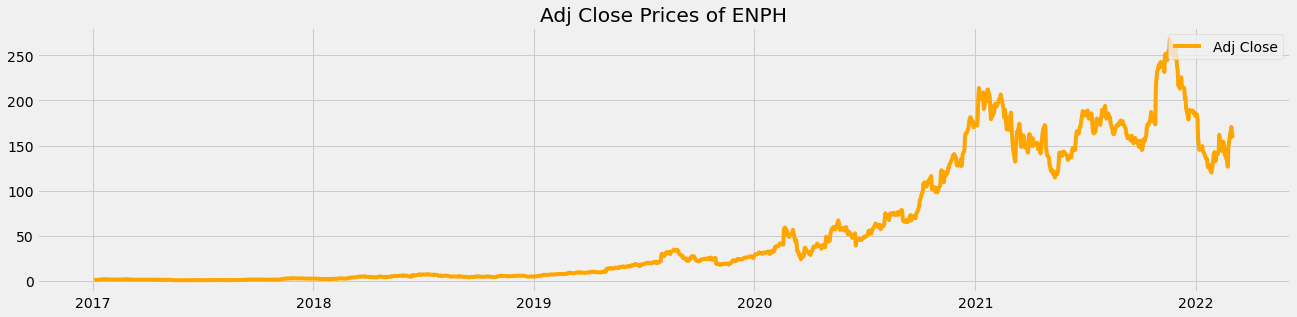

In [22]:
plt.subplot(2,1,1)
plt.plot(df['AdjClose'],  label='Adj Close', color="orange" )
plt.legend(loc="upper right")
plt.title('Adj Close Prices of ENPH')

In [23]:
# a significant upward trend from 2020 to 2021 (increasing from xxx to xxx.)

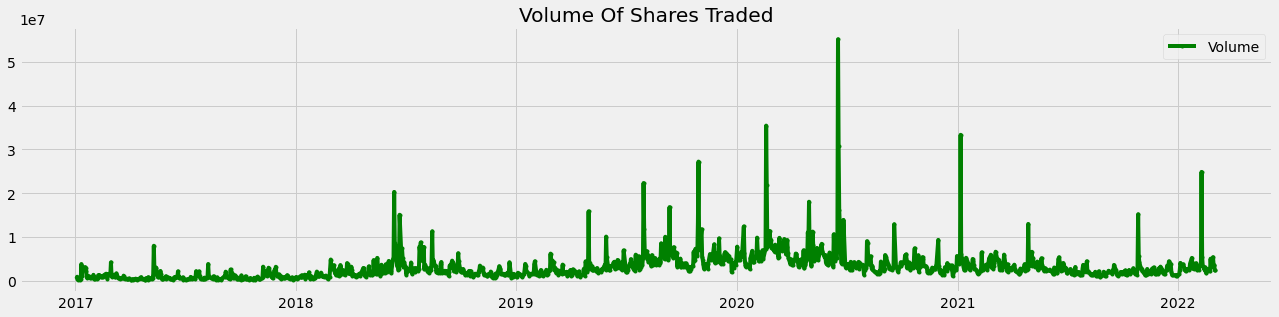

In [24]:
#Plot "Volume" and "Date" of ENPH
plt.subplot(2,1,2)
plt.plot(df['Volume'], '.-', label='Volume', color="green" )
plt.legend(loc="upper right")
plt.title('Volume Of Shares Traded')
plt.show()

<AxesSubplot:ylabel='Density'>

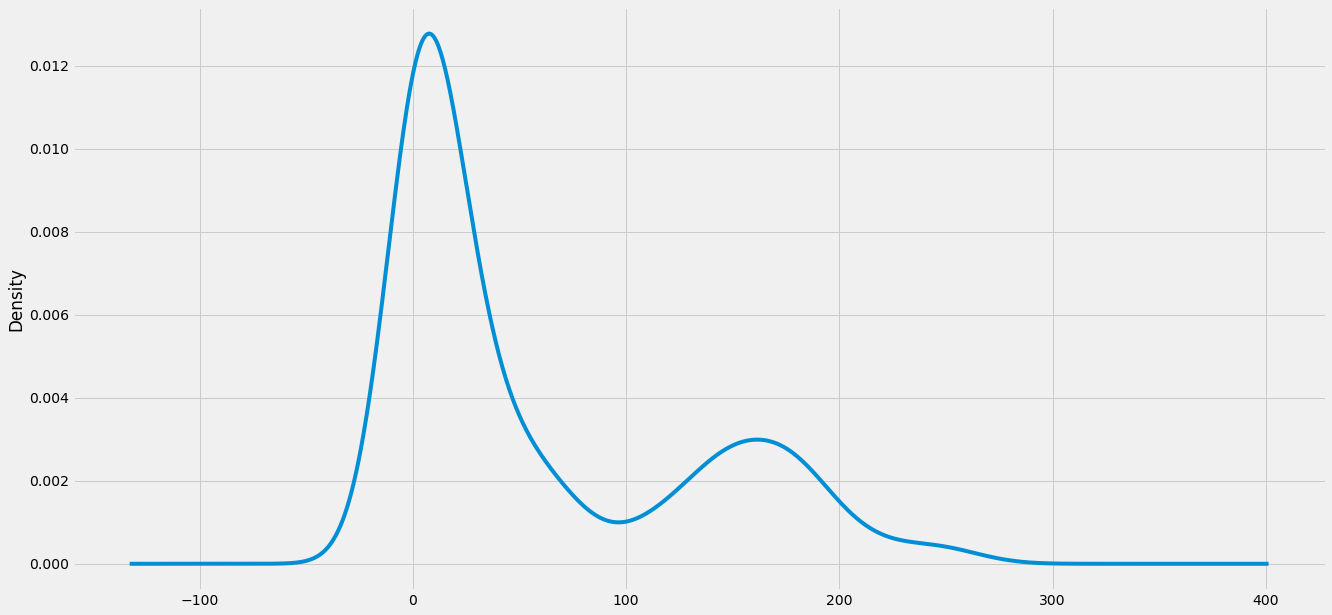

In [25]:
#Distribution of the dataset
df_adjclose = df['AdjClose']
df_adjclose.plot(kind='kde')

# 4.Linear Regression

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [28]:
#split data into features and target values
y = df['AdjClose'].values
X = df.drop(['AdjClose'],1).values

/Users/ruiminma/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [29]:
# Split the  data into a traing and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [30]:
# Create a StandardScaler instance
scaler = StandardScaler()

In [31]:
# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

In [32]:
# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [33]:
# importing module
from sklearn.linear_model import LinearRegression

In [34]:
# creating an object of LinearRegression class
module = LinearRegression()

In [35]:
# fitting the training data
module.fit(X_train_scaled,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [36]:
y_prediction =  module.predict(X_test_scaled )
y_prediction

array([  1.23    ,   0.94    ,  27.23    , 183.449997,   0.94    ,
         0.79    ,  25.4     ,  57.220001, 125.120003,  55.43    ,
        19.639999, 188.690002,   0.76    ,   2.1     ,   0.84    ,
         0.82    ,   4.41    ,   1.41    ,  19.65    , 204.039993,
         4.15    , 181.419998,  64.169998,  67.040001, 122.959999,
         2.6     , 190.850006,   1.3     ,  51.639999,  39.610001,
        28.719999,   0.82    , 163.080002,   0.96    , 163.449997,
        15.81    ,   1.41    ,   0.86    ,   2.37    ,   4.26    ,
         4.54    ,   3.94    ,  18.120001, 139.25    ,   5.79    ,
         1.35    ,  34.34    ,   4.9     , 129.589996,   1.37    ,
        26.809999,  21.870001,  15.92    ,   4.74    ,   5.08    ,
         1.21    ,   5.98    ,   1.25    , 177.270004,  98.57    ,
       175.490005,  29.67    ,   0.92    , 172.240005,   7.02    ,
       165.339996, 127.260002,  54.490002,   5.53    ,  32.560001,
        33.490002, 128.850006,  18.440001,   3.85    ,  60.360

In [37]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [38]:
# predicting the accuracy score
score=r2_score(y_test,y_prediction)
print("accuracy is =",score)
print("mean_sqrd_error is =",mean_squared_error(y_test,y_prediction))
print("root_mean_squared error of is =",np.sqrt(mean_squared_error(y_test,y_prediction)))

accuracy is = 1.0
mean_sqrd_error is = 6.923687429717172e-29
root_mean_squared error of is = 8.320869804123348e-15
